<a href="https://colab.research.google.com/github/sunin1104/Repository/blob/main/20250611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boston 주택 가격 예측 모델

## 데이터 로드 및 전처리


In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
404
102


In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean1=train_data.mean(axis=0)
train_data=train_data-mean1

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std1=train_data.std(axis=0)
train_data=train_data/std1

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
mean2=test_data.mean(axis=0)
test_data=test_data-mean2

std2=test_data.std(axis=0)
test_data=test_data/std2


## 모델 구성 및 컴파일

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
  # input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 모델 학습

In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history=model.fit(
    train_data, train_labels,
    validation_data=(test_data,test_labels),
    epochs=20,
    batch_size=32
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 569.1848 - mae: 22.1709 - val_loss: 599.1531 - val_mae: 22.6691
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 586.6771 - mae: 22.1726 - val_loss: 567.0211 - val_mae: 21.8624
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 523.2418 - mae: 20.8121 - val_loss: 530.3154 - val_mae: 20.8950
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 452.8140 - mae: 19.1671 - val_loss: 482.7558 - val_mae: 19.6092
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 453.1677 - mae: 18.8482 - val_loss: 418.0332 - val_mae: 18.0258
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 373.3311 - mae: 16.7760 - val_loss: 337.9074 - val_mae: 16.1267
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 313.2883 - mae: 14.7876 - val_loss: 247.9991 - val_mae: 13.6864
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 211.8216 - mae: 12.0673 - val_loss: 158.6228 - val_mae: 10.7476
Epoch 9/20
13/13 ━━━━

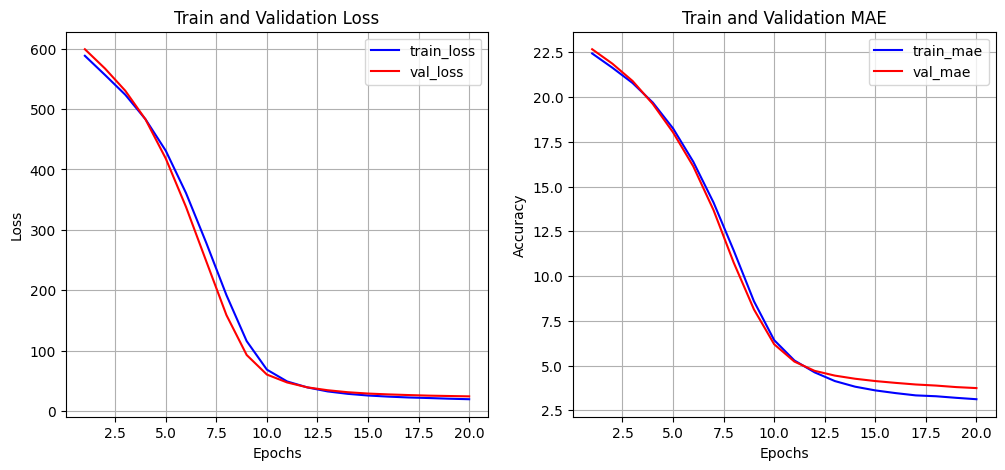

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
# plt.imshow(image, cmap='Greys')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_mae= model.evaluate(test_data,test_labels)

print(f"손실도: {test_loss:.2f}")
print(f"평가지표: {test_mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.8515 - mae: 3.6219 
손실도: 24.02
평가지표: 3.74


#Reuters 딥러닝 모델

## 데이터 로드 및 전처리

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data,train_labels),(test_data,test_labels)=reuters.load_data()

train_data,val_data,train_labels,val_labels=train_test_split(
    train_data,train_labels,test_size=0.25, random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
6736
2246
2246
46


In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results=np.zeros((len(data),dim))
  for i, sequence in enumerate(data):
      filtered = [index for index in sequence if index < dim]
      results[i, filtered]=1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train=to_categorical(train_labels)
y_val=to_categorical(val_labels)
y_test=to_categorical(test_labels)


## 모델 구성 및 컴파일



In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model=Sequential([
    Dense(512, input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(y_train.shape[1],activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,266,734 (20.09 MB)

 Trainable params: 5,265,198 (20.09 MB)

 Non-trainable params: 1,536 (6.00 KB)

## 모델 학습


In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint=ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(
    x_train,y_train,
    epochs=30,
    batch_size=512,
    validation_data=(x_val,y_val),
    callbacks=[checkpoint,early_stopping]
)


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.2974 - loss: 3.2495
Epoch 1: val_loss improved from inf to 2.99728, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step - accuracy: 0.3076 - loss: 3.2028 - val_accuracy: 0.6287 - val_loss: 2.9973
Epoch 2/30
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7005 - loss: 1.3506
Epoch 2: val_loss improved from 2.99728 to 2.54934, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7052 - loss: 1.3170 - val_accuracy: 0.7235 - val_loss: 2.5493
Epoch 3/30
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7663 - loss: 0.9932
Epoch 3: val_loss improved from 2.54934 to 2.30092, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7712 - loss: 0.9750 - val_accuracy: 0.7520 - val_loss: 2.3009
Epoch 4/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8213 - loss: 0.7850
Epoch 4: val_loss improved from 2.30092 to 2.08982, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8224 - loss: 0.7785 - val_accuracy: 0.7538 - val_loss: 2.0898
Epoch 5/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8646 - loss: 0.5899
Epoch 5: val_loss improved from 2.08982 to 1.85482, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8648 - loss: 0.5882 - val_accuracy: 0.7547 - val_loss: 1.8548
Epoch 6/30
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8889 - loss: 0.4598
Epoch 6: val_loss improved from 1.85482 to 1.68065, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8897 - loss: 0.4578 - val_accuracy: 0.7533 - val_loss: 1.6806
Epoch 7/30
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9171 - loss: 0.3640
Epoch 7: val_loss improved from 1.68065 to 1.52493, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9175 - loss: 0.3620 - val_accuracy: 0.7427 - val_loss: 1.5249
Epoch 8/30
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9343 - loss: 0.2936
Epoch 8: val_loss improved from 1.52493 to 1.37595, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9328 - loss: 0.2972 - val_accuracy: 0.7556 - val_loss: 1.3759
Epoch 9/30
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9435 - loss: 0.2490
Epoch 9: val_loss improved from 1.37595 to 1.25342, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9434 - loss: 0.2504 - val_accuracy: 0.7663 - val_loss: 1.2534
Epoch 10/30
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9559 - loss: 0.2067
Epoch 10: val_loss improved from 1.25342 to 1.16125, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9545 - loss: 0.2122 - val_accuracy: 0.7809 - val_loss: 1.1613
Epoch 11/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9544 - loss: 0.1965
Epoch 11: val_loss improved from 1.16125 to 1.07009, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9545 - loss: 0.1963 - val_accuracy: 0.7930 - val_loss: 1.0701
Epoch 12/30
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9535 - loss: 0.1912
Epoch 12: val_loss improved from 1.07009 to 1.00599, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9548 - loss: 0.1887 - val_accuracy: 0.7965 - val_loss: 1.0060
Epoch 13/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9627 - loss: 0.1582
Epoch 13: val_loss improved from 1.00599 to 0.94325, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9624 - loss: 0.1589 - val_accuracy: 0.8037 - val_loss: 0.9433
Epoch 14/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9626 - loss: 0.1521
Epoch 14: val_loss improved from 0.94325 to 0.90336, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9626 - loss: 0.1524 - val_accuracy: 0.8085 - val_loss: 0.9034
Epoch 15/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9659 - loss: 0.1527
Epoch 15: val_loss improved from 0.90336 to 0.87356, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9658 - loss: 0.1527 - val_accuracy: 0.8126 - val_loss: 0.8736
Epoch 16/30
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9692 - loss: 0.1340
Epoch 16: val_loss improved from 0.87356 to 0.85549, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9691 - loss: 0.1336 - val_accuracy: 0.8130 - val_loss: 0.8555
Epoch 17/30
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9694 - loss: 0.1219
Epoch 17: val_loss improved from 0.85549 to 0.84739, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9691 - loss: 0.1227 - val_accuracy: 0.8170 - val_loss: 0.8474
Epoch 18/30
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9692 - loss: 0.1213
Epoch 18: val_loss improved from 0.84739 to 0.84513, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9685 - loss: 0.1230 - val_accuracy: 0.8157 - val_loss: 0.8451
Epoch 19/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9637 - loss: 0.1247
Epoch 19: val_loss improved from 0.84513 to 0.84384, saving model to best_model.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9638 - loss: 0.1253 - val_accuracy: 0.8175 - val_loss: 0.8438
Epoch 20/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9712 - loss: 0.1155
Epoch 20: val_loss did not improve from 0.84384
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9708 - loss: 0.1168 - val_accuracy: 0.8179 - val_loss: 0.8478
Epoch 21/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9681 - loss: 0.1169
Epoch 21: val_loss did not improve from 0.84384
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9680 - loss: 0.1174 - val_accuracy: 0.8219 - val_loss: 0.8536
Epoch 22/30
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9700 - loss: 0.1024
Epoch 22: val_loss did not improve from 0.84384
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9697 - loss: 0.1038 - val_accuracy: 0.8192 - val_loss: 0.8604
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 19.


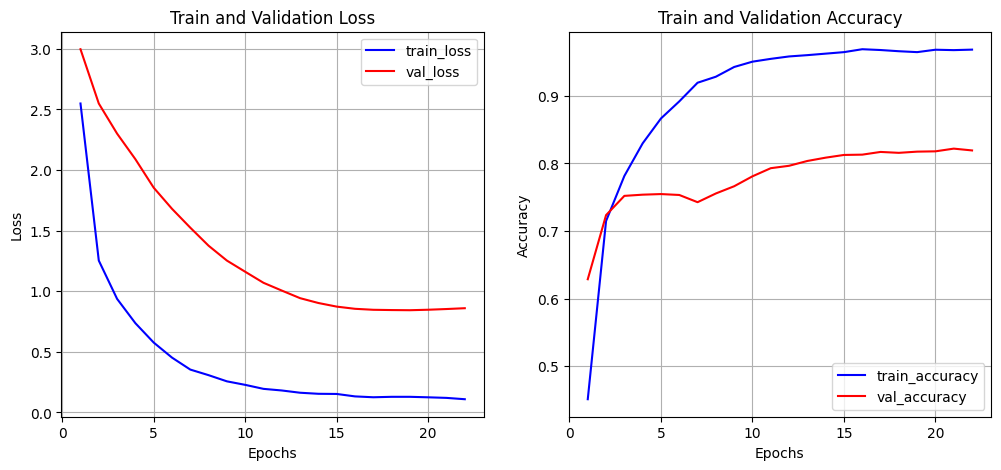

In [25]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측


In [27]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 손실(loss): {test_loss:.2f}")
print(f"테스트 정확도(accuracy): {test_acc:.2f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8062 - loss: 0.9012
테스트 손실(loss): 0.92
테스트 정확도(accuracy): 0.80


#CIFAR10 딥러닝 모델

## 데이터 로드 및 전처리

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [35]:
# 전체 데이터 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# train, val 분할
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.20, random_state=42
)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [36]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

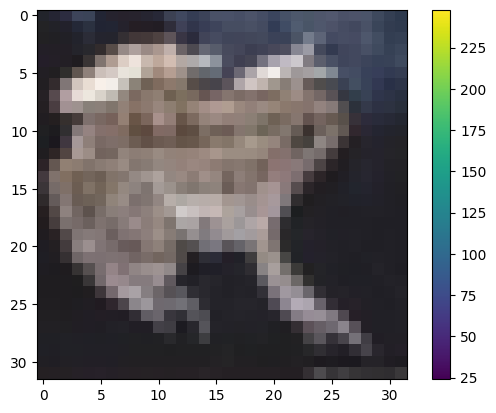

In [37]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [38]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [39]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32*32*3))
x_val = x_val.reshape((x_val.shape[0], 32*32*3))
x_test = x_test.reshape((x_test.shape[0], 32*32*3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


정규화

In [40]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일


In [56]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import regularizers

model = Sequential([
    Dense(512, input_shape=(3072,), kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

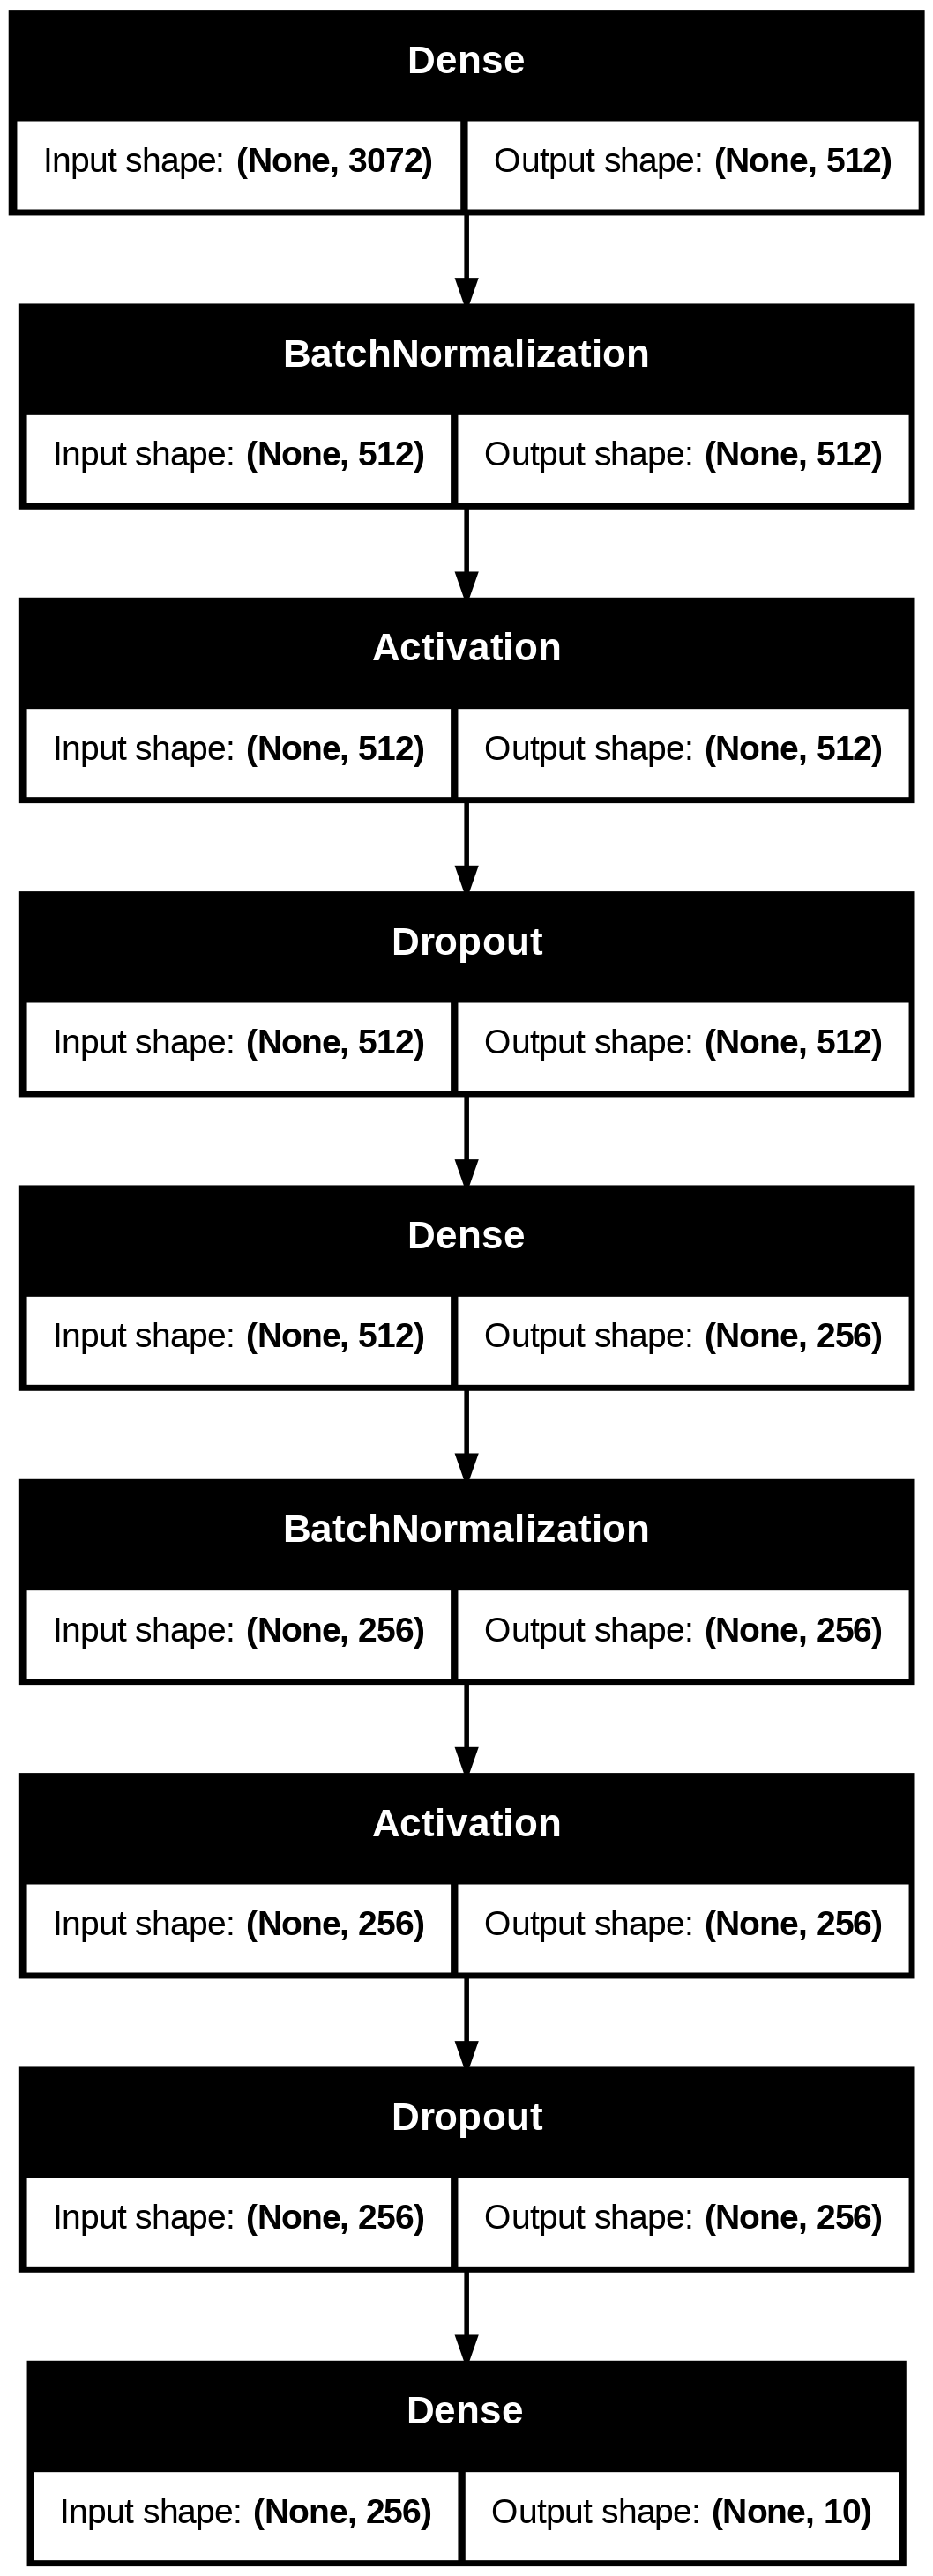

In [57]:
utils.plot_model(model, show_shapes=True)

## 모델 학습

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint: 검증 정확도(val_accuracy)가 가장 높을 때 모델 저장
checkpoint = ModelCheckpoint(
    filepath='best_cifar10_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# EarlyStopping: 검증 정확도가 5 에포크 동안 개선되지 않으면 학습 중단
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2715 - loss: 3.2457
Epoch 1: val_accuracy improved from -inf to 0.29950, saving model to best_cifar10_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2720 - loss: 3.2414 - val_accuracy: 0.2995 - val_loss: 2.4546
Epoch 2/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3736 - loss: 2.2290
Epoch 2: val_accuracy did not improve from 0.29950
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3736 - loss: 2.2289 - val_accuracy: 0.2558 - val_loss: 2.3217
Epoch 3/50
608/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3905 - loss: 2.0587
Epoch 3: val_accuracy improved from 0.29950 to 0.30110, saving model to best_cifar10_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3904 - loss: 2.0584 - val_accuracy: 0.3011 - val_loss: 2.2115
Epoch 4/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3894 - loss: 2.0117
Epoch 4: val_accuracy improved from 0.30110 to 0.33260, saving model to best_cifar10_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3894 - loss: 2.0117 - val_accuracy: 0.3326 - val_loss: 2.1343
Epoch 5/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3963 - loss: 1.9884
Epoch 5: val_accuracy did not improve from 0.33260
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3963 - loss: 1.9884 - val_accuracy: 0.3072 - val_loss: 2.1858
Epoch 6/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3958 - loss: 1.9742
Epoch 6: val_accuracy improved from 0.33260 to 0.34720, saving model to best_cifar10_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3958 - loss: 1.9743 - val_accuracy: 0.3472 - val_loss: 2.1179
Epoch 7/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3916 - loss: 1.9853
Epoch 7: val_accuracy did not improve from 0.34720
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3916 - loss: 1.9854 - val_accuracy: 0.2961 - val_loss: 2.2618
Epoch 8/50
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4048 - loss: 1.9779
Epoch 8: val_accuracy did not improve from 0.34720
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4047 - loss: 1.9780 - val_accuracy: 0.2834 - val_loss: 2.2132
Epoch 9/50
611/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4015 - loss: 1.9733
Epoch 9: val_accuracy did not improve from 0.34720
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4015 - loss: 1.9735 - val_accuracy: 0.3425 - val_loss: 2.1298
Epoch 10/50
610/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4015 - loss: 1.9812
Epoch 10: val_accuracy did not imp

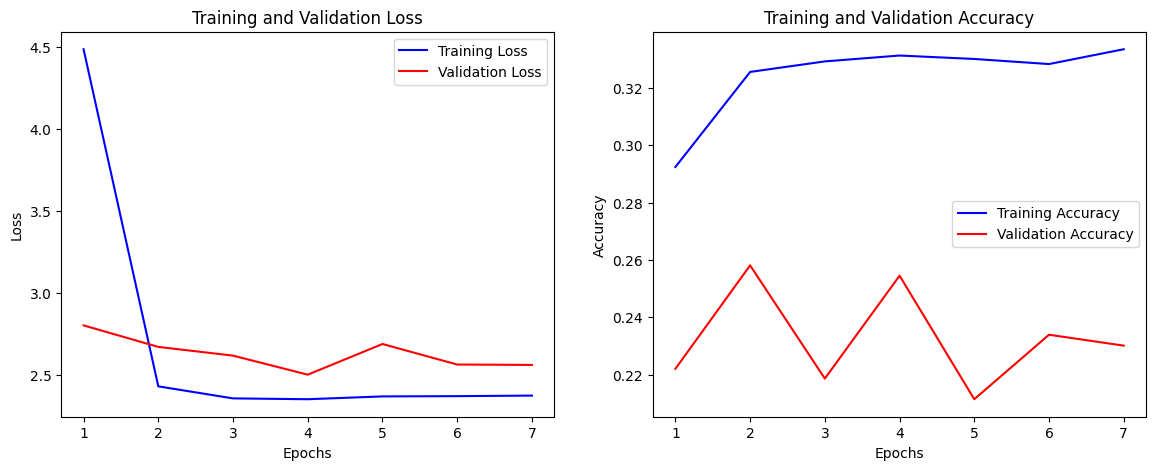

In [54]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 학습 과정에서 저장된 loss, val_loss, accuracy, val_accuracy 값 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14,5))

# 손실 함수 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 모델 평가 및 예측

In [55]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2642 - loss: 2.6749


[2.6740078926086426, 0.259799987077713]